In [3]:
!pip install -U scikit-learn

You should consider upgrading via the 'C:\Users\lsofi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



     ---------------------------------------- 7.3/7.3 MB 11.5 MB/s eta 0:00:00
     --------------------------------------- 36.9/36.9 MB 13.1 MB/s eta 0:00:00


# Training a sentiment analysis classifier based on supervised machine learning algorithms

In [182]:
import string

import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [109]:
pd.set_option('display.max_colwidth', None)

In [110]:
stop_words = set(stopwords.words('spanish'))

In [111]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

### Loading labeled tweets

In [112]:
# Dataset loaded from: https://docs.google.com/spreadsheets/d/11_E2ngsEOyTQwbwVVRHY5urzFF95BQCV/edit#gid=1788161364
tweets_df = pd.read_csv('./data/tweets_labeled3.csv', sep = ';')

In [113]:
tweets_df.shape

(508, 3)

In [114]:
tweets_df.head()

,full_text,sentiment,emotion
0,"@IvanDuque Sus socios de las AGC tienen este platanal vuelto mierda, pero no haces nada, usted inservible, ha logrado la peor inflación en Colombia y solo pública maricadas sin sentido, se robó las elecciones para entregar el país, valiente idiota tenemos de presidente.",negative,anger
1,"@PDleh @cokycafe @PGN_COL En Colombia existen miles de leyes para controlar los funcionarios públicos pero a la hora de aplicarlas ""se les olvida que existen"". ¿Que más pruebas quieren? ¿Porque avalan unas elecciones, las del 13 de marzo, donde pado de todo lo que no debía de pasar? Escuchamos respuestas",neutral,anger
2,Petro ahora es el Capitán América o mejor dicho el Capitán Colombia de ganar las elecciones. No soltara el escudo ni para dormir ?? https://t.co/k56Dv7id1J,positive,joy
3,"#OtraPregunta \n""Petro promete reanudar relaciones diplomáticas con Maduro si gana elecciones en Colombia""...\nEsto no pinta nada bien... y si además gana Lula en Brasil...\n¿Esto como que va para largo? https://t.co/wpQsl5KoRe",neutral,fear
4,"Así como estamos en Colombia no pueden haber elecciones, primero toca proteger el país de los narcoterroristas donde se tiene que empezar por fumigar para acabar con la coca y los narcoasesinos terroristas, las elecciones no serían prioridad hasta que no renuncie el registrador",negative,anger


In [115]:
tweets_df['sentiment'].value_counts(dropna = False, normalize = True)

negative    0.702756
neutral     0.246063
positive    0.051181
Name: sentiment, dtype: float64

In [116]:
tweets_df['emotion'].value_counts(dropna = False, normalize = True)

anger      0.624016
joy        0.212598
fear       0.124016
sadness    0.037402
NaN        0.001969
Name: emotion, dtype: float64

### Leaving out unlabeled texts, this data is not useful for training or validating a supervised model

In [117]:
# Removing  unlabeled tweets
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]

In [118]:
tweets_labeled_df.shape

(508, 3)

In [119]:
tweets_unlabeled_df = tweets_df.loc[tweets_df['sentiment'].isnull()]

In [120]:
tweets_unlabeled_df.shape

(0, 3)

In [121]:
# Scenario 1: Modelo multi-clase para los tres sentimientos.


### Splitting train and test datasets

In [122]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.2, stratify = tweets_labeled_df['sentiment'], random_state = 1)


In [123]:
X_train.shape

(406,)

In [124]:
pd.Series(y_train).value_counts(normalize = True)

negative    0.701970
neutral     0.246305
positive    0.051724
Name: sentiment, dtype: float64

In [125]:
X_test.shape

(102,)

In [126]:
pd.Series(y_test).value_counts(normalize = True)

negative    0.705882
neutral     0.245098
positive    0.049020
Name: sentiment, dtype: float64

### Vectorizing texts

<table>
    <tbody>
        <tr>
            <td>
                <h4>Bag of Words</h4>
                <img src="./imgs/bow.png" style="width: 500px;">
            </td>
            <td>
                <h4>TF-IDF</h4>
                <img src="./imgs/tf-idf.png" style="width: 500px;">
            </td>
        </tr>
    </tbody>
</table>

In [127]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [128]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [129]:
X_bow = bow.fit_transform(X_train)

In [130]:
X_tfidf = tfidf.fit_transform(X_train)

### Training and evaluating a model using BOW

In [131]:
model = RandomForestClassifier()

In [132]:
model.fit(X_bow, y_train)

RandomForestClassifier()

In [133]:
y_train_bow_predict = model.predict(X_bow)
y_test_bow_predict = model.predict(bow.transform(X_test))

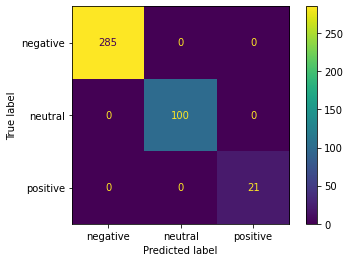

In [134]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

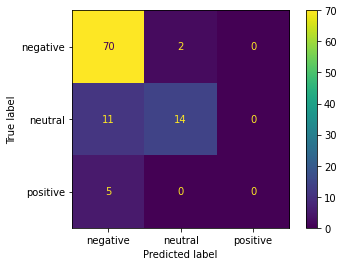

In [135]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [ ]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_test, y_test_bow_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_test, y_test_bow_predict, pos_label = 'positive'))
print('F1:', f1_score(y_test, y_test_bow_predict, pos_label = 'positive'))

In [137]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_test, y_test_bow_predict, average = None))
print('Recall:', recall_score(y_test, y_test_bow_predict, average = None))
print('F1:', f1_score(y_test, y_test_bow_predict, average = None))

Precision: [0.81395349 0.875      0.        ]
Recall: [0.97222222 0.56       0.        ]
F1: [0.88607595 0.68292683 0.        ]


C:\Users\lsofi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Training and evaluating a model using TF-IDF

In [166]:
model = RandomForestClassifier()

In [167]:
model.fit(X_tfidf, y_train)

RandomForestClassifier()

In [168]:
y_train_tfidf_predict = model.predict(X_tfidf)
y_test_tfidf_predict = model.predict(bow.transform(X_test))

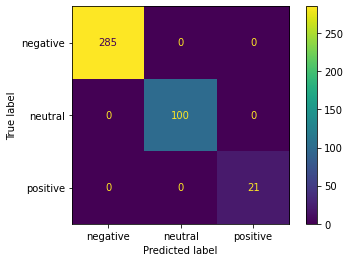

In [169]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

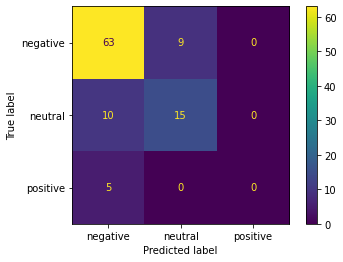

In [170]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [ ]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_test, y_test_tfidf_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, pos_label = 'positive'))
print('F1:', f1_score(y_test, y_test_tfidf_predict, pos_label = 'positive'))

In [173]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_test, y_test_tfidf_predict, average = None))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, average = None))
print('F1:', f1_score(y_test, y_test_tfidf_predict, average = None))

Precision: [0.80769231 0.625      0.        ]
Recall: [0.875 0.6   0.   ]
F1: [0.84      0.6122449 0.       ]


C:\Users\lsofi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [183]:
model = MLPClassifier()

In [184]:
model.fit(X_tfidf, y_train)

MLPClassifier()

In [185]:
y_train_tfidf_predict = model.predict(X_tfidf)
y_test_tfidf_predict = model.predict(bow.transform(X_test))

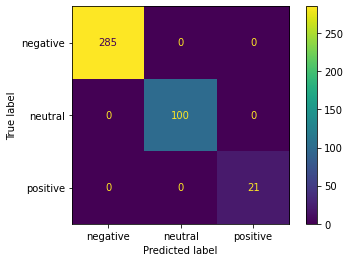

In [186]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

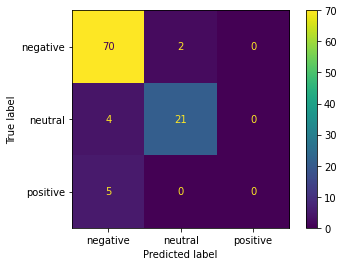

In [187]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [188]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_test, y_test_tfidf_predict, average = None))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, average = None))
print('F1:', f1_score(y_test, y_test_tfidf_predict, average = None))

Precision: [0.88607595 0.91304348 0.        ]
Recall: [0.97222222 0.84       0.        ]
F1: [0.92715232 0.875      0.        ]


C:\Users\lsofi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### How interpret the results?

<table>
    <tbody>
        <tr>
            <td>
                <img src="./imgs/confusion-matrix.png" style="height: 400px;">
            </td>
            <td>
                <img src="./imgs/precision-recall.png" style="height: 600px;">
            </td>
        </tr>
    </tbody>
</table>

### Analyzing errors

In [144]:
error_df = pd.concat(
    [ pd.concat([X_test, y_test ], axis = 1).reset_index(),
    pd.Series(y_test_bow_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

error_df.drop('index', inplace = True, axis = 1)

In [145]:
error_df.shape

(102, 3)

In [146]:
error_df.loc[error_df['actual'] != error_df['predicted']].head(30)

,full_text,actual,predicted
4,En Colombia hace falta un presidente como @nayibbukele que no le teme a nada y va de frente contra las fuerzas oscuras aliadas con políticos que lo único que buscas es inestabilidad en el país previo a elecciones.,positive,negative
5,Gastón Garriga: cómo multiplicar algunas ideas de CFK/Colombia avanza hacia elecciones con Petro amenazado/Interacción con oyentes.,neutral,negative
6,"???? El próximo domingo 29 de mayo, #Colombia tendrá su jornada de elecciones presidenciales. Aquí te contamos cuáles son las propuestas de tecnología y transformación digital de los 8 candidatos. ????\nhttps://t.co/ddIaxzHUtS",neutral,negative
17,Cerca de 3 mil jurados de votación de la Registraduría están inhabilitados. \n\nLa indagación fue adelantada por la Procuraduría ante las primarias de las elecciones presidenciales de Colombia. \nhttps://t.co/DrcoKxOTPs,neutral,negative
27,"@petrogustavo Esto está imparable!\n #ProgresistaSigueProgresista , #SúmateAlCambio , #YaLlegaElCambio .\nSigamos sumando y logremos transformar a Colombia con Petro y Francia! A ganar las elecciones en primera vuelta! Sígueme y te sigo!",positive,negative
31,@PGN_COL S.O.S. Colombia no podemos permitir que nos roben las elecciones. Viva @PalomaValenciaL gran patriota https://t.co/N9ro2Fy5fF,positive,negative
37,"¿Enserio?, Es que en Colombia no hay democracia ahora no puede un conservador apoyar a @petrogustavo ¿o que pasa?\nhttps://t.co/ZCVgxM4Kti",negative,neutral
38,Buenos días! ...y entonces quienes entre las Cortes y congresistas (¿Quiénes fueron?) que armaron triquiñuelas para que el actual registrador llegara al cargo...menos se manifiestan a que lo revoquen...se acorta el tiempo para las elecciones y él ahí campante! Peligra Colombia!,negative,neutral
44,Las reglas del juego político que estableció la Constitución de 1991 debilitaron el sistema bipartidista y trajo un revolcón que favoreció a un sistema caudillista que hasta hoy se siente. https://t.co/tVxPTMLSrA,neutral,negative
46,Petro retomará lazos con Venezuela si llega a Presidencia de Colombia https://t.co/U2HIRmOSsR,neutral,negative


In [189]:
tweets_df = pd.read_csv('./data/tweets_labeled3.csv', sep = ';')
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]
# Scenario 2: Modelo binario, para los sentimientos negativo y positivo.
# Removing neutral class
tweets_labeled_df = tweets_labeled_df.loc[tweets_labeled_df['sentiment'].isin(['positive', 'negative'])]


In [190]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.2, stratify = tweets_labeled_df['sentiment'], random_state = 1)


In [191]:
X_train.shape

(306,)

In [192]:
pd.Series(y_train).value_counts(normalize = True)

negative    0.931373
positive    0.068627
Name: sentiment, dtype: float64

In [193]:
X_test.shape

(77,)

In [194]:
pd.Series(y_test).value_counts(normalize = True)

negative    0.935065
positive    0.064935
Name: sentiment, dtype: float64

In [195]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [196]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [197]:
X_bow = bow.fit_transform(X_train)

In [198]:
X_tfidf = tfidf.fit_transform(X_train)

In [199]:
### Training and evaluating a model using BOW

In [203]:
model = RandomForestClassifier()
model.fit(X_tfidf, y_train)

RandomForestClassifier()

In [204]:
y_train_tfidf_predict = model.predict(X_tfidf)
y_test_tfidf_predict = model.predict(bow.transform(X_test))

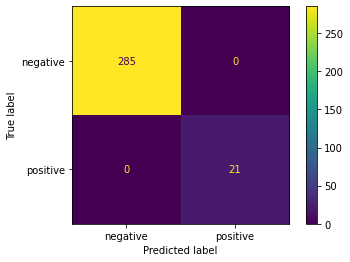

In [205]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

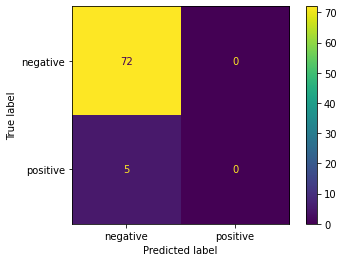

In [206]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [208]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_test, y_test_tfidf_predict, average = None))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, average = None))
print('F1:', f1_score(y_test, y_test_tfidf_predict, average = None))

Precision: [0.93506494 0.        ]
Recall: [1. 0.]
F1: [0.96644295 0.        ]


C:\Users\lsofi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [214]:
model = DecisionTreeClassifier()
model.fit(X_tfidf, y_train)

DecisionTreeClassifier()

In [215]:
y_train_tfidf_predict = model.predict(X_tfidf)
y_test_tfidf_predict = model.predict(bow.transform(X_test))

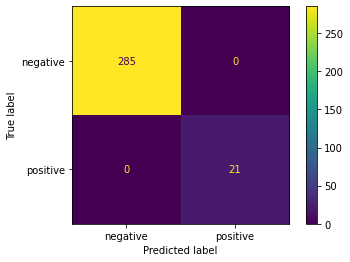

In [216]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

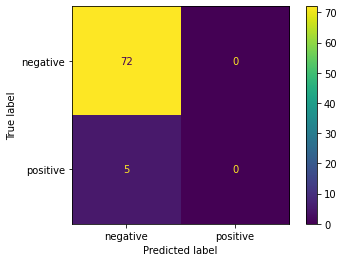

In [217]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [218]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_test, y_test_tfidf_predict, average = None))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, average = None))
print('F1:', f1_score(y_test, y_test_tfidf_predict, average = None))

Precision: [0.94202899 0.125     ]
Recall: [0.90277778 0.2       ]
F1: [0.92198582 0.15384615]


In [219]:
tweets_df = pd.read_csv('./data/tweets_labeled3.csv', sep = ';')
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]
# Scenario 3: Modelo binario, para los sentimientos negativo, y positivo más neutral tratados como uno solo.
tweets_labeled_df['sentiment'] = tweets_labeled_df['sentiment'].replace({'neutral': 'positive'})

In [220]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.2, stratify = tweets_labeled_df['sentiment'], random_state = 1)


In [221]:
X_train.shape

(406,)

In [222]:
pd.Series(y_train).value_counts(normalize = True)

negative    0.70197
positive    0.29803
Name: sentiment, dtype: float64

In [223]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [224]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [225]:
X_bow = bow.fit_transform(X_train)

In [226]:
X_tfidf = tfidf.fit_transform(X_train)

In [227]:
### Training and evaluating a model using BOW

In [231]:
model = RandomForestClassifier()
model.fit(X_tfidf, y_train)

RandomForestClassifier()

In [232]:
y_train_tfidf_predict = model.predict(X_tfidf)
y_test_tfidf_predict = model.predict(bow.transform(X_test))

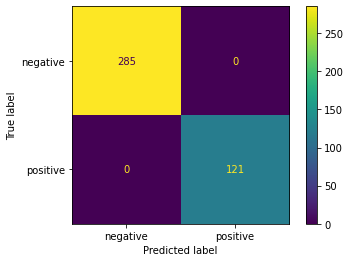

In [233]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

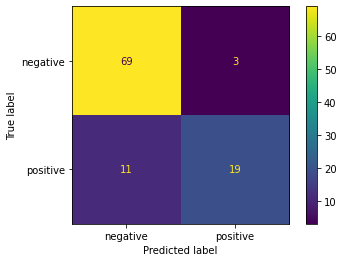

In [234]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [235]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_test, y_test_tfidf_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, pos_label = 'positive'))
print('F1:', f1_score(y_test, y_test_tfidf_predict, pos_label = 'positive'))

Precision: 0.5641025641025641
Recall: 0.7333333333333333
F1: 0.6376811594202899


In [236]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_test, y_test_tfidf_predict, average = None))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, average = None))
print('F1:', f1_score(y_test, y_test_tfidf_predict, average = None))

Precision: [0.87301587 0.56410256]
Recall: [0.76388889 0.73333333]
F1: [0.81481481 0.63768116]


In [237]:
model = MLPClassifier()
model.fit(X_tfidf, y_train)

MLPClassifier()

In [238]:
y_train_tfidf_predict = model.predict(X_tfidf)
y_test_tfidf_predict = model.predict(bow.transform(X_test))

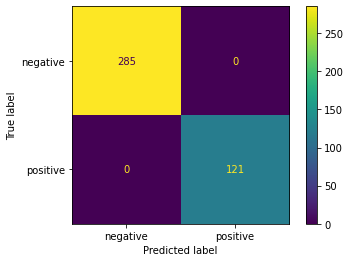

In [239]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

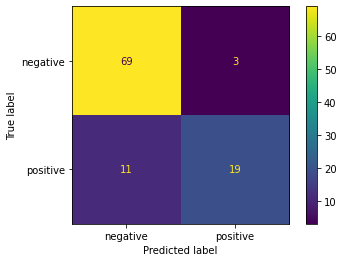

In [240]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [241]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_test, y_test_tfidf_predict, average = None))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, average = None))
print('F1:', f1_score(y_test, y_test_tfidf_predict, average = None))

Precision: [0.89473684 0.84615385]
Recall: [0.94444444 0.73333333]
F1: [0.91891892 0.78571429]


In [242]:
model = DecisionTreeClassifier()
model.fit(X_tfidf, y_train)

DecisionTreeClassifier()

In [243]:
y_train_tfidf_predict = model.predict(X_tfidf)
y_test_tfidf_predict = model.predict(bow.transform(X_test))

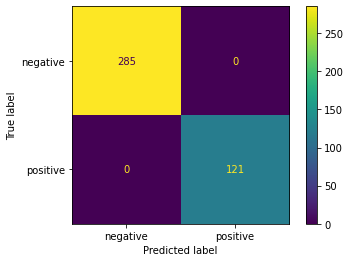

In [244]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

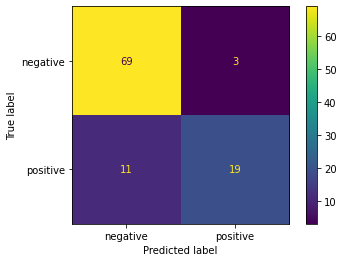

In [245]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [246]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_test, y_test_tfidf_predict, average = None))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, average = None))
print('F1:', f1_score(y_test, y_test_tfidf_predict, average = None))

Precision: [0.85714286 0.35135135]
Recall: [0.33333333 0.86666667]
F1: [0.48 0.5 ]
